### Student Information
Name: 岑美茵

Student ID: 109022521

GitHub ID: MeiIanSam

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [875]:
### Begin Assignment Here

import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/meiiansam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [876]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

### Part1: take home exercises

In [877]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [883]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [884]:
### Exercise2:

print("use .query() to get the data satisfy the condition ")
print(X.query('category == 1'))

print("Sort in reverse order:")
print(X[::-1])

use .query() to get the data satisfy the condition 
                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    com

In [885]:
### Exercise5:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
display(NA_df)

print(NA_df['missing_example'].isnull())

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


In [886]:
# Exercise5 Answer here:
for element in NA_df["missing_example"]:
    print(type(element))
    
print('\n')
print("Ans:")
print("Because there are three type of object representing NULL value in pandas： np.nan (not a number), None, pd.NaT (not a time)")
print("And `np.nan` is a np.float64 object, `None` is a python Nonetype object")
print("but 'None', '', 'NaN' these three are string type. Therefore, is.null() cannot detect them.")

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


Ans:
Because there are three type of object representing NULL value in pandas： np.nan (not a number), None, pd.NaT (not a time)
And `np.nan` is a np.float64 object, `None` is a python Nonetype object
but 'None', '', 'NaN' these three are string type. Therefore, is.null() cannot detect them.


In [887]:
X.dropna(inplace=True)
X.drop_duplicates(keep=False, inplace=True)

In [888]:
X_sample = X.sample(n=1000,random_state=42) #random state

In [889]:
### Exercise6:
display(X)
display(X_sample)

for i in range(4):
    print("categroy", i)
    print("category prob. in X = ", len(X[X['category'] == i])/len(X))
    print("category prob. in X_sample = ",len(X_sample[X_sample['category'] == i])/len(X_sample))
    print("-----")
    
print("1. X contains 2257 data, X_sample contains 1000 data only.")
print("2. The order of X_sample is different from X, that is X_sample is not cut a continous piece of X with 1000 data.")
print("3. The probability distribution of X and X_sample similar because of the random sampling, but they are slightly different because X_sample is only the subset of X.")

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


categroy 0
category prob. in X =  0.21267168808152415
category prob. in X_sample =  0.206
-----
categroy 1
category prob. in X =  0.25875055383252105
category prob. in X_sample =  0.247
-----
categroy 2
category prob. in X =  0.2631812140008861
category prob. in X_sample =  0.277
-----
categroy 3
category prob. in X =  0.2653965440850687
category prob. in X_sample =  0.27
-----
1. X contains 2257 data, X_sample contains 1000 data only.
2. The order of X_sample is different from X, that is X_sample is not cut a continous piece of X with 1000 data.
3. The probability distribution of X and X_sample similar because of the random sampling, but they are slightly different because X_sample is only the subset of X.


277


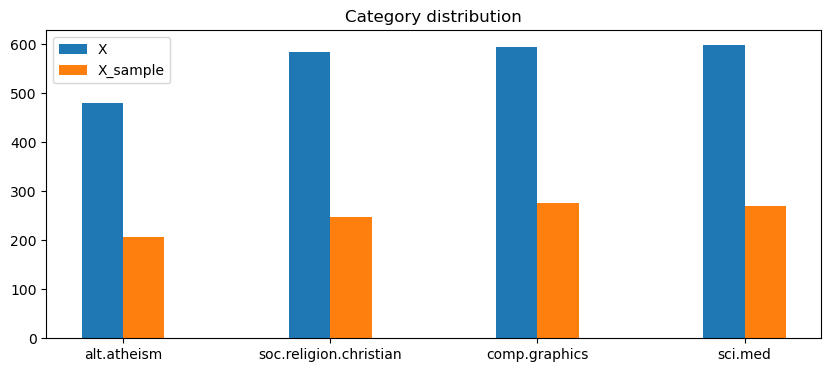

In [890]:
### Exercise8:

print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50

s = X.category_name.value_counts()
s = s.sort_index()

s2 = X_sample.category_name.value_counts()
s2 = s2.sort_index() 

plt.figure(figsize = (10,4))
X_axis = np.arange(len(categories)) 
  
plt.bar(X_axis - 0.1, s, 0.2, label = 'X') 
plt.bar(X_axis + 0.1, s2, 0.2, label = 'X_sample') 
  
plt.xticks(X_axis, categories) 
plt.title("Category distribution") 
plt.legend() 

In [891]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze(X.text[0])
analyze(" ".join(list(X[:1].text)))
count_vect.get_feature_names_out()[0:10]
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [892]:
### Exercise10:

tmp = X_counts[4, 0:100].toarray()
n = np.argsort(tmp)[0,-2]
print('The word is:', count_vect.get_feature_names_out()[n])

The word is: 01


(36,)


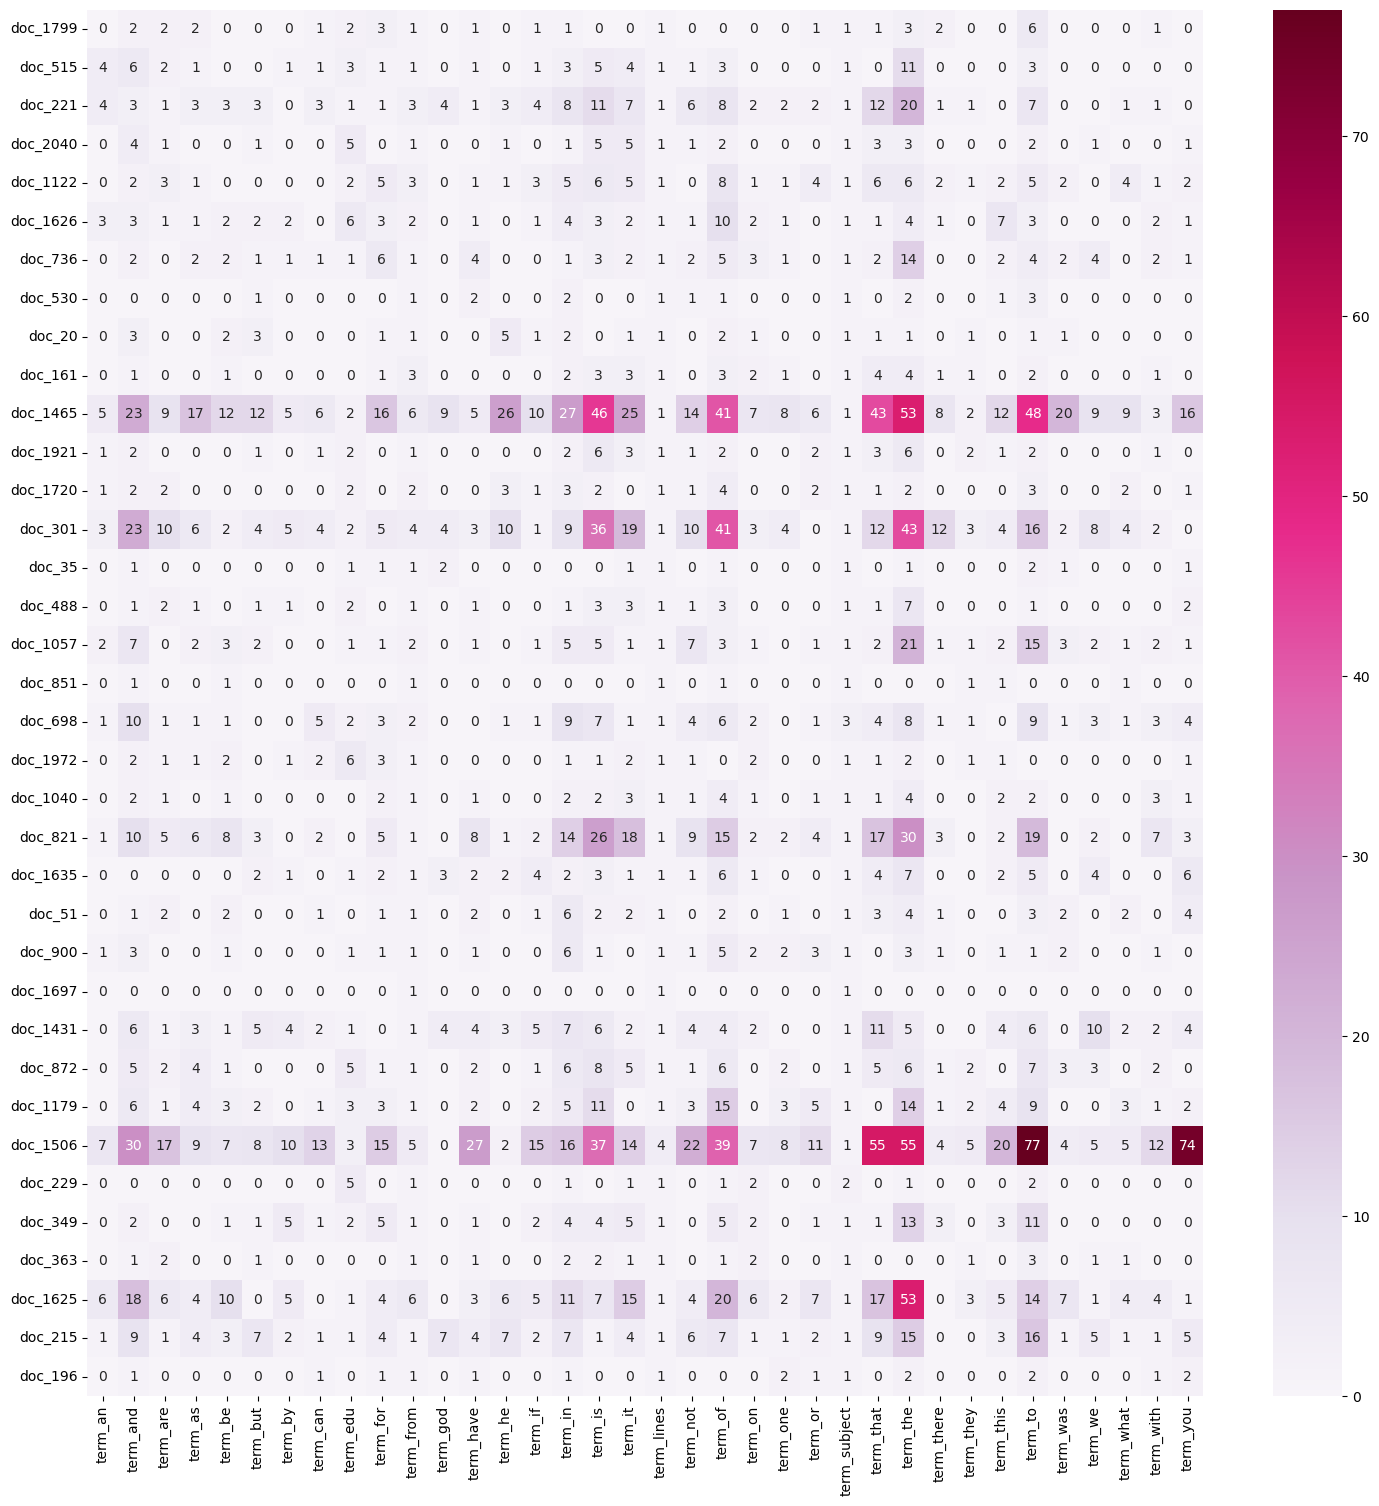

In [893]:
### Exercise11:

"""
Because most of the element is zero, so we need to know where are the non-zero elements, and plot them out.
We need to focus on the columns that the terms with the largest freqencies, because non-zero element will appear in those columns with larger probability.

Therefore, I select the terms with Top 0.1% frequencies. (column locations)
For the documents, I do the random selection (row locations). Because it is meaningless to do sorting. The probability of intersection is not confirmed by marginal probabilities always. So we only need to select the columns with larger probability.
"""

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
c = np.percentile(term_frequencies, 99.9)
mask = term_frequencies >= c
n = len(mask[mask == True])
docs = np.random.randint(0,len(X), size=(n))
print(docs.shape)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[mask]]
plot_y = ["doc_"+ str(i) for i in np.array(X.index)[docs]]

plot_z = X_counts[docs][:,mask].toarray() #df_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(18, 18))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd", annot=True)

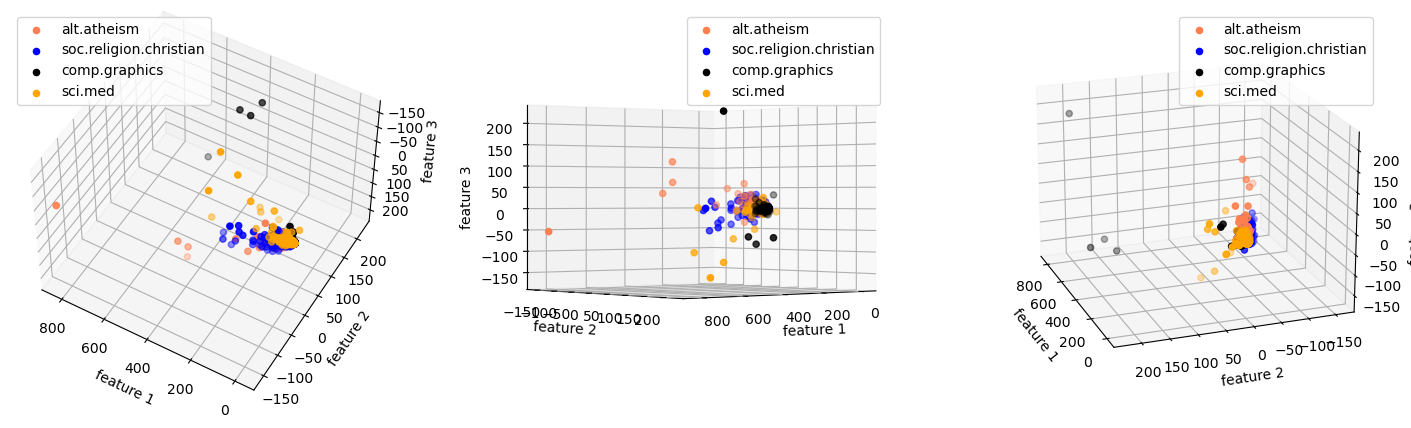

In [894]:
### Exercise12:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize =  (18,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o', label = category)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_zlabel('feature 3')
    if i == 0:
        ax.view_init(-130,60) 
    elif i == 1:
        ax.view_init(0,50) 
    elif i == 2:
        ax.view_init(20, 160) 
    ax.legend()

In [895]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [896]:
### Exercise13:

import plotly.express as px  

df = {"terms": list(count_vect.get_feature_names_out()[:300]),
      "frequency": list(term_frequencies[:300])}
fig = px.bar(df, x = 'terms', y = 'frequency')  
fig.show()

In [897]:
### Exercise14:

print("The distribution that term frequency larger than 99.5% data (which is top 0.5%), total number is", len(x))

q_995 = np.percentile(term_frequencies,99.5)
mask = term_frequencies > q_995
x = count_vect.get_feature_names_out()[mask]
y = term_frequencies[mask]

df = {"terms": x,
      "frequency": y}
fig = px.bar(df, x = 'terms', y = 'frequency')
fig.update_layout(
    title={
        'text': "Top 0.5% of distribution",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

The distribution that term frequency larger than 99.5% data (which is top 0.5%), total number is 178


In [898]:
### Exercise15:

mask = np.argsort(-y)

df = {"terms": x[mask],
      "frequency": y[mask]}
fig = px.bar(df, x = 'terms', y = 'frequency')  
fig.update_layout(
    title={
        'text': "Top 0.5% of sorted distribution",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


In [899]:
### Exercise16:

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
display(X[0:9])

print("It works. We can know label binarizer also works for the nominal type of data from this example.")

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


It works. We can know label binarizer also works for the nominal type of data from this example.


### Part2:

In [955]:
# data preparation: combine three dataset
names = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']

sentences = []
scores = []
for name in names:
    file = open(r'./sentiment-labelled-sentences/'+name,'r')
    lines = file.readlines()
    for line in lines:
        sentence, score = line.strip().split('\t')
        sentences.append(sentence)
        scores.append(int(score))

In [956]:
# (Exercise 1) see some samples in the dataset :

for i in range(3):
    print(sentences[i], scores[i])

So there is no way for me to plug it in here in the US unless I go by a converter. 0
Good case, Excellent value. 1
Great for the jawbone. 1


In [957]:
# transform to pandas dataframe.
df = pd.DataFrame()
df["sentence"] = sentences
df["score"] = scores

df

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [958]:
# also add a colomn about the score representaing good or bad
grade = np.array(["string"]*len(scores))

grade[np.array(scores) == 0] = "bad"
grade[np.array(scores) == 1] = "good"

df['grade'] = grade

display(df)

,sentence,score,grade
0,So there is no way for me to plug it in here i...,0,bad
1,"Good case, Excellent value.",1,good
2,Great for the jawbone.,1,good
3,Tied to charger for conversations lasting more...,0,bad
4,The mic is great.,1,good
...,...,...,...
2995,I think food should have flavor and texture an...,0,bad
2996,Appetite instantly gone.,0,bad
2997,Overall I was not impressed and would not go b...,0,bad
2998,"The whole experience was underwhelming, and I ...",0,bad


In [959]:
## (Exercise2) Experiment with other querying techniques:
print("use .query() to get the data satisfy the condition ")
print(df.query('score == 1'))

print("Sort in reverse order:")
print(df[::-1])

use .query() to get the data satisfy the condition 
                                               sentence  score grade
1                           Good case, Excellent value.      1  good
2                                Great for the jawbone.      1  good
4                                     The mic is great.      1  good
7           If you are Razr owner...you must have this!      1  good
10                      And the sound quality is great.      1  good
...                                                 ...    ...   ...
2899                       Overall, a great experience.      1  good
2901  Their regular toasted bread was equally satisf...      1  good
2907  The chips and sals a here is amazing!!!!!!!!!!...      1  good
2909              This is my new fav Vegas buffet spot.      1  good
2922  Every time I eat here, I see caring teamwork t...      1  good

[1500 rows x 3 columns]
Sort in reverse order:
                                               sentence  score grade
299

In [961]:
## (Exercise3) Record the data with good grade ,and query every 10th record. Only show the first 5 records. :

(df[df['grade'] == "good"].iloc[::10])[:5]

,sentence,score,grade
1,"Good case, Excellent value.",1,good
21,I bought this to use with my Kindle Fire and a...,1,good
44,Excellent bluetooth headset.,1,good
61,I really recommend this faceplates since it lo...,1,good
78,"I love this phone , It is very handy and has a...",1,good


In [962]:
# check if null value exists.
df.isnull()

,sentence,score,grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [963]:
# compute the total number of null value (by coloumn).
df.isnull().apply(lambda x: dmh.check_missing_values(df))

,sentence,score,grade
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [964]:
# compute the total number of null value (by row) (Exercise4).
tmp = df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

n_null = 0
for i in range(len(tmp)):
    (string, n) = tmp[i]
    if n == 0:
        continue
    else:
        print("NULL value exists")
        n_null += 1
print(n_null, " data contain NULL value")

0  data contain NULL value


In [965]:
# check if duplicated data exists.
print("number of duplicated data: ", sum(df.duplicated()))

number of duplicated data:  17


In [966]:
# show the duplicated data in the data set
df[df.duplicated(keep = False)].sort_values(by=['sentence'])

,sentence,score,grade
1788,10/10,1,good
1125,10/10,1,good
1363,Definitely worth checking out.,1,good
1090,Definitely worth checking out.,1,good
748,Does not fit.,0,bad
446,Does not fit.,0,bad
180,Don't buy this product.,0,bad
543,Don't buy this product.,0,bad
402,Excellent product for the price.,1,good
892,Excellent product for the price.,1,good


In [967]:
# drop the duplicated data.
df.drop_duplicates(keep='first', inplace=True)
print("number of duplicated data: ", sum(df.duplicated()))

number of duplicated data:  0


In [968]:
# sampling 1000 data as a subset

df_sample = df.sample(n= 1000,random_state=42) #random state
display(df_sample)

,sentence,score,grade
2423,We've tried to like this place but after 10+ t...,0,bad
1558,The script is a big flawed mess.,0,bad
889,It was that loud.Glad to say that the Plantron...,1,good
332,The reception is excellent!,1,good
1850,Now imagine that every single one of those dec...,0,bad
...,...,...,...
926,It looses connection to the phone even when it...,0,bad
1221,There are the usual Hitchcock logic flaws.,0,bad
2724,Awesome selection of beer.,1,good
2470,"Very good, though!",1,good


In [969]:
# (Exercise 6) difference between sampled data set and original data set :

print("1. size: ", "original = ", len(df), "sampled = ", len(df_sample))
print("2. By observation, order of the data is different")
print("3. distribution of the category: ")
print("grade good: ", "original = ", len(df[df['grade'] == 'good'])/len(df), "sampled = ", len(df_sample[df_sample['grade'] == 'good'])/len(df_sample))
print("grade bad: ", "original = ", len(df[df['grade'] == 'bad'])/len(df), "sampled = ", len(df_sample[df_sample['grade'] == 'bad'])/len(df_sample))
print("which is slightly different.")

1. size:  original =  2983 sampled =  1000
2. By observation, order of the data is different
3. distribution of the category: 
grade good:  original =  0.49949715051961113 sampled =  0.494
grade bad:  original =  0.5005028494803889 sampled =  0.506
which is slightly different.


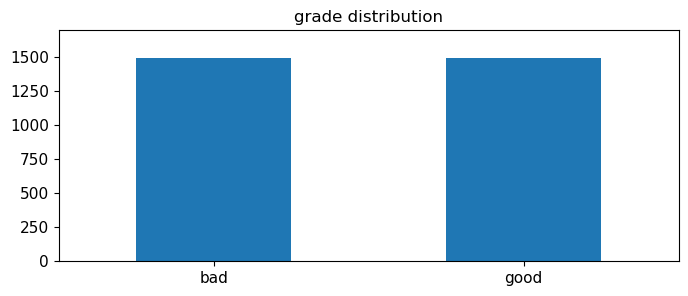

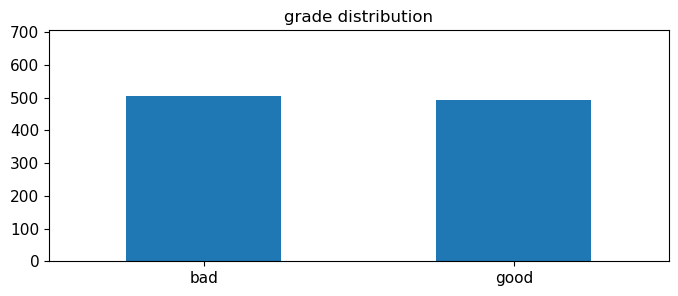

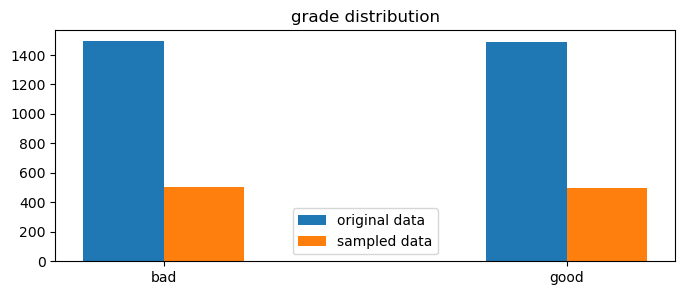

In [970]:
# (Exercise 7 and 8) grade distribution of original data and sampled data and combined them to one graph .

plt.figure()
upper_bound = max(df.grade.value_counts() + 200)
df.grade.value_counts().plot(kind = 'bar',
                                    title = 'grade distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

plt.figure()
upper_bound = max(df_sample.grade.value_counts() + 200)
df_sample.grade.value_counts().plot(kind = 'bar',
                                    title = 'grade distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

grades = ['bad', 'good']
s = df.grade.value_counts()
s = s.sort_index()

s2 = df_sample.grade.value_counts()
s2 = s2.sort_index() 

plt.figure(figsize = (8,3))
X_axis = np.arange(len(grades)) 
  
plt.bar(X_axis - 0.1, s, 0.2, label = 'original data') 
plt.bar(X_axis + 0.1, s2, 0.2, label = 'sampled data') 
  
plt.xticks(X_axis, grades) 
plt.title("grade distribution") 
plt.legend() 

In [971]:
# create unigram
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df

,sentence,score,grade,unigrams
0,So there is no way for me to plug it in here i...,0,bad,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,good,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,good,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,bad,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,good,"[The, mic, is, great, .]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,bad,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,bad,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,bad,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,bad,"[The, whole, experience, was, underwhelming, ,..."


In [972]:
# create document-term matrix

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix

In [973]:
# (Exercise 9) Analyze the first record of our data :

analyze = count_vect.build_analyzer()
analyze(df.sentence[0]) #tokenize, delete stop words...

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [974]:
# see some of the words
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [975]:
# observe the term-document matrix (not full)
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [976]:
# (Exercise 10) there is a `1` exist in doc_4 within first 100 word, the word is: 
tmp = df_counts[3, 0:100].toarray()
ns = np.argsort(tmp)[0,-1:]
print(ns)
# n = ns[ns != 0]
print('The word is:', count_vect.get_feature_names_out()[ns])

[45]
The word is: ['45']


['term_3o', 'term_40', 'term_40min', 'term_42', 'term_44', 'term_45', 'term_4s', 'term_4ths', 'term_50', 'term_5020', 'term_510', 'term_5320', 'term_54', 'term_5lb', 'term_680', 'term_70', 'term_70000', 'term_700w', 'term_70s', 'term_80']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0

,term_3o,term_40,term_40min,term_42,term_44,term_45,term_4s,term_4ths,term_50,term_5020,term_510,term_5320,term_54,term_5lb,term_680,term_70,term_70000,term_700w,term_70s,term_80
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


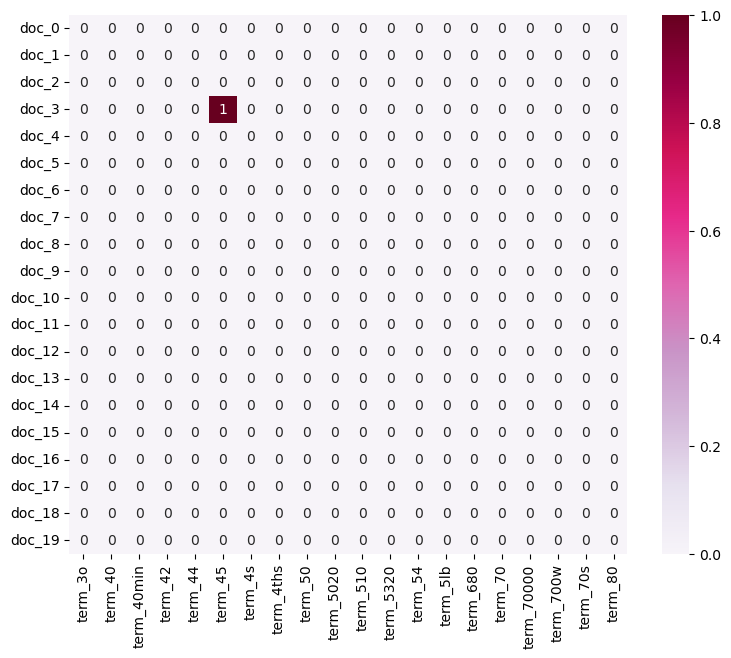

In [977]:
#plot term-document matrix

#As we know, doc_4 and term with index 45 contains a `1`, lets illustate it. so we plot the term-document matrix near elment (3,45).

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[40:60]]
print(plot_x)

plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
print(plot_y)

plot_z = df_counts[0:20, 40:60].toarray() #df_counts[how many documents, how many terms]
print(plot_z)

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

(26,)


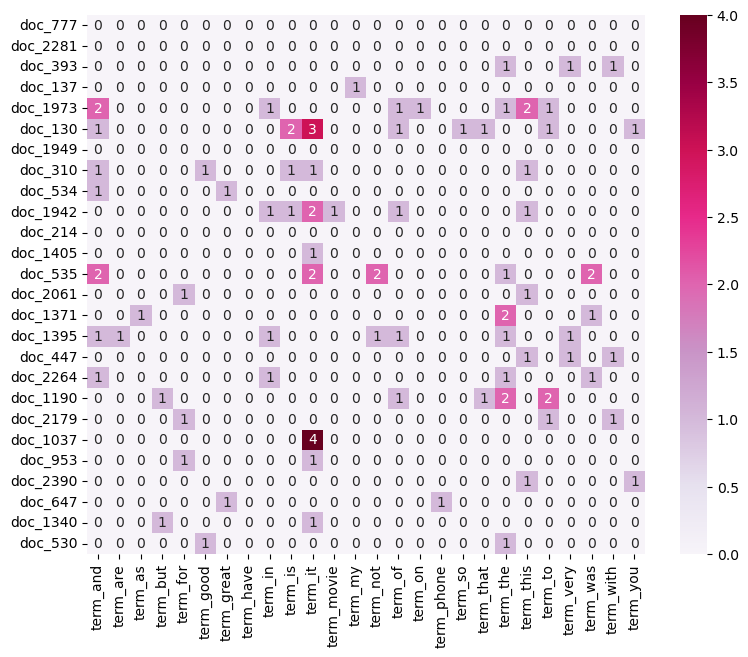

In [978]:
# (Exercise 11) plot the term-document matrix efficiently :

"""
same idea as part 1 exercise 11.
choose the terms with top 0.5% frequencies, and random select the documents.
"""

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
c = np.percentile(term_frequencies, 99.5)
mask = term_frequencies >= c
n = len(mask[mask == True])
docs = np.random.randint(0,len(df), size=(n))
print(docs.shape)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[mask]]
plot_y = ["doc_"+ str(i) for i in np.array(df.index)[docs]]

plot_z = df_counts[docs][:,mask].toarray() #df_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd", annot=True)

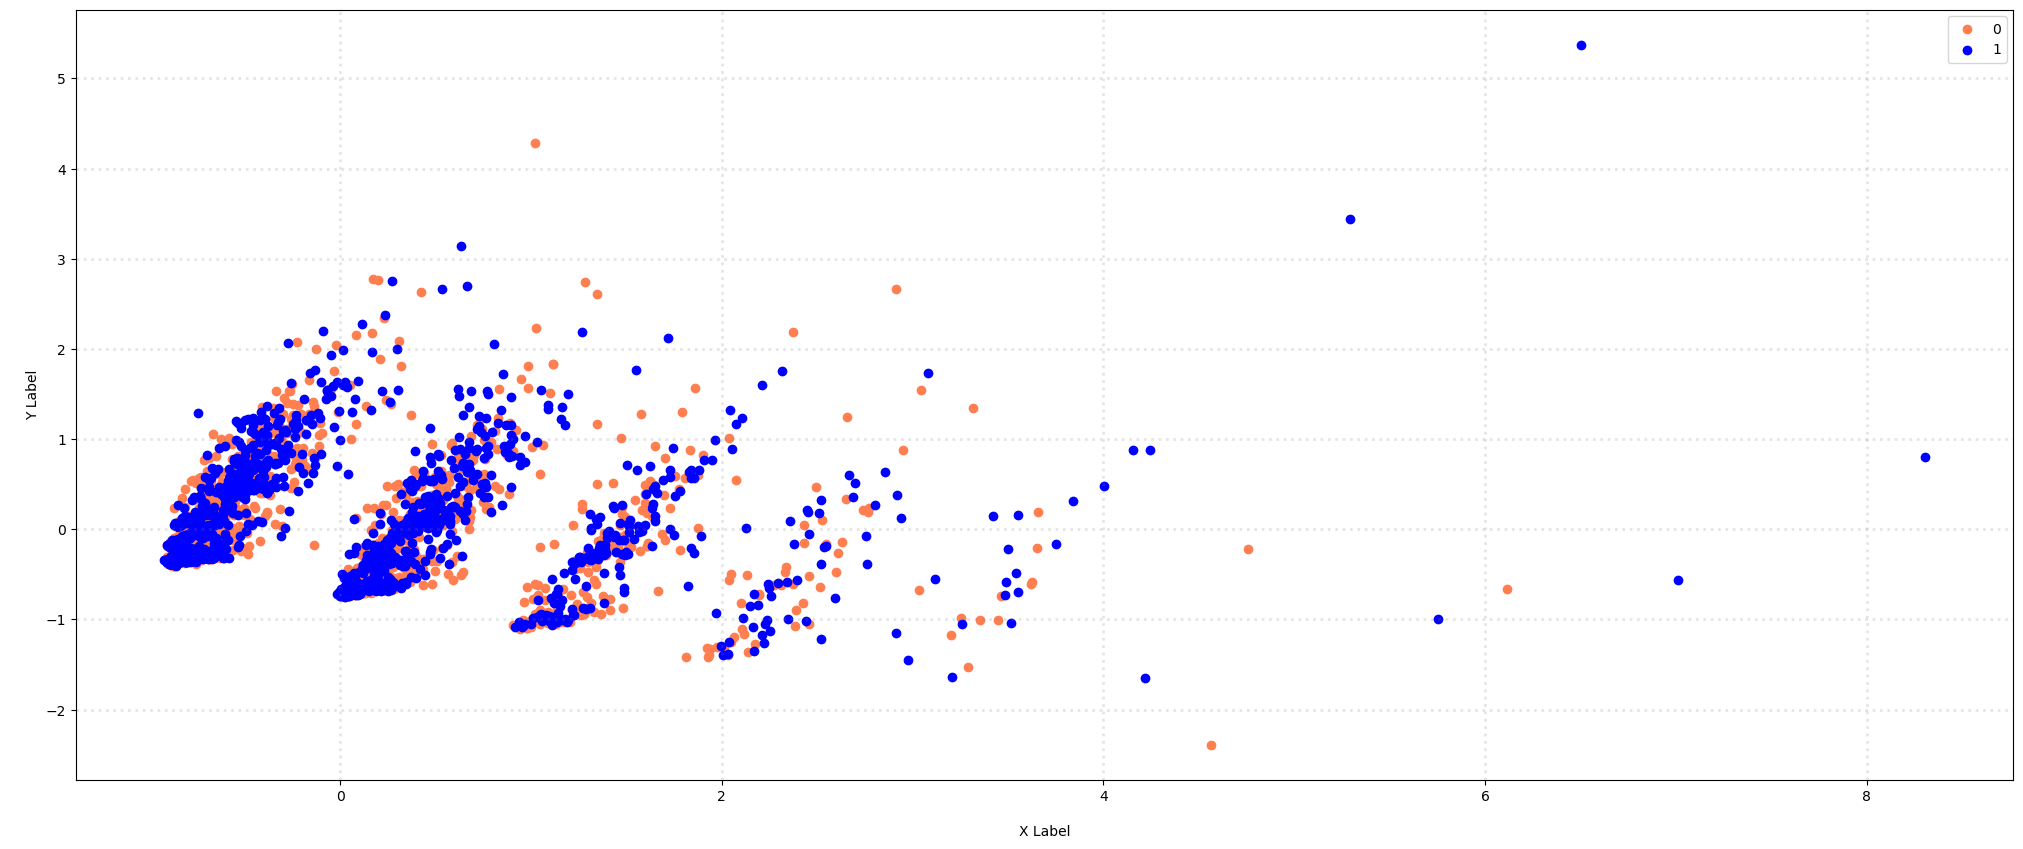

In [979]:
# dimension reduction PCA : --> 2D
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

col = ['coral', 'blue']
scores = [0,1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = df_reduced[df['score'] == score].T[0]
    ys = df_reduced[df['score'] == score].T[1]
    ax.scatter(xs, ys, c = c, marker='o', label = str(score))

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.legend()

plt.show()

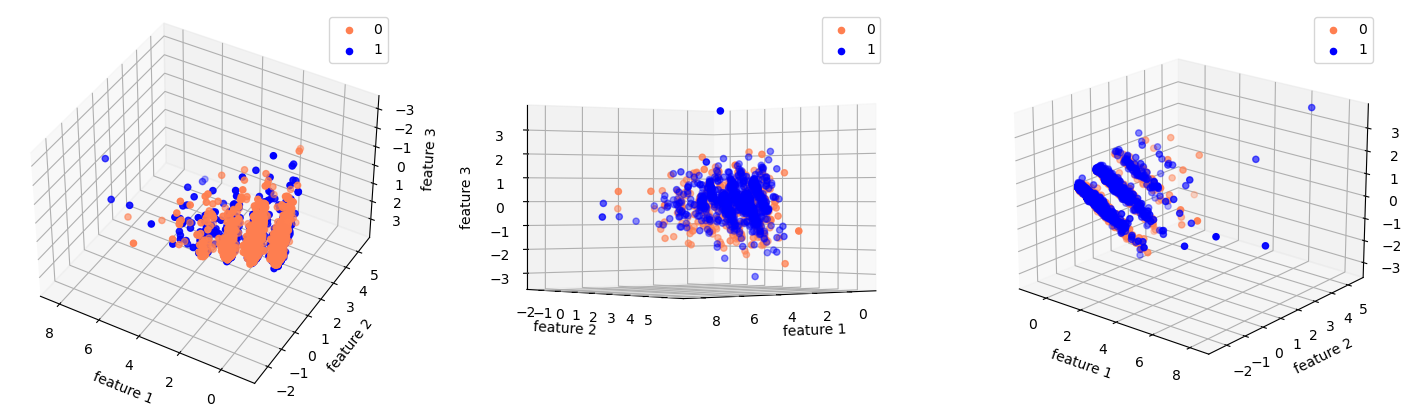

In [980]:
# dimension reduction PCA : --> 3D (Exercise 12):
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']
scores = [0,1]
fig = plt.figure(figsize =  (18,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    for c, score in zip(col, scores):
        xs = df_reduced[df['score'] == score].T[0]
        ys = df_reduced[df['score'] == score].T[1]
        zs = df_reduced[df['score'] == score].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o', label = str(score))
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_zlabel('feature 3')
    if i == 0:
        ax.view_init(-140,60) 
    elif i == 1:
        ax.view_init(0,50) 
    elif i == 2:
        ax.view_init(20, -50) 
    ax.legend()

In [981]:
# compute the term frequency over all documents.

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [982]:
print("sum of first term `00` is", term_frequencies[0])

sum of first term `00` is 1


In [983]:
# (Exercise 13) interactive visualization of term frequencies distribution.

df_ = {"terms": list(count_vect.get_feature_names_out()[:300]),
      "frequency": list(term_frequencies[:300])}
fig = px.bar(df_, x = 'terms', y = 'frequency')  
fig.show()

In [984]:
# (Exercise 14) reduce the number of terms and see the distribution.

# Note that here I choose the largest 2% of data.

q_98 = np.percentile(term_frequencies,98)
mask = term_frequencies > q_98
x = count_vect.get_feature_names_out()[mask]
y = term_frequencies[mask]

df_ = {"terms": x,
      "frequency": y}
fig = px.bar(df_, x = 'terms', y = 'frequency')  
fig.show()

print("The distribution that term frequency larger than 98% data (Top 2%), total number is", len(x))

The distribution that term frequency larger than 98% data (Top 2%), total number is 100


In [985]:
# (Exercise 15) distribution with sorting

mask = np.argsort(-y)

df_ = {"terms": x[mask],
      "frequency": y[mask]}
fig = px.bar(df_, x = 'terms', y = 'frequency')  
fig.update_layout(
    title={
        'text': "Top 2% of distribution",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

print("The sorted distribution that term frequency larger than 98% data, total number is", len(x))

The sorted distribution that term frequency larger than 98% data, total number is 100


In [986]:
#log distribution

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

x = np.array(count_vect.get_feature_names_out())
y = np.array(term_frequencies_log)

mask = np.argsort(-y)

df_ = {"terms": x[mask[:200]],
      "frequency": y[mask[:200]]}
fig = px.bar(df_, x = 'terms', y = 'frequency')  
fig.update_layout(
    title={
        'text': "log distribution of largest 200 frequencies",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [987]:
#Discretization and Binarization

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.score)
df['bin_category_score'] = mlb.transform(df['score']).tolist()
df

,sentence,score,grade,unigrams,bin_category_score
0,So there is no way for me to plug it in here i...,0,bad,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,good,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,good,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,bad,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,good,"[The, mic, is, great, .]",[1]
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,bad,"[I, think, food, should, have, flavor, and, te...",[0]
2996,Appetite instantly gone.,0,bad,"[Appetite, instantly, gone, .]",[0]
2997,Overall I was not impressed and would not go b...,0,bad,"[Overall, I, was, not, impressed, and, would, ...",[0]
2998,"The whole experience was underwhelming, and I ...",0,bad,"[The, whole, experience, was, underwhelming, ,...",[0]


In [988]:
# (Exercise 16) use grade to do the bin_category :

mlb.fit(df.grade)
df['bin_category_grade'] = mlb.transform(df['grade']).tolist()
df[0:9]

,sentence,score,grade,unigrams,bin_category_score,bin_category_grade
0,So there is no way for me to plug it in here i...,0,bad,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,good,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,good,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,bad,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,good,"[The, mic, is, great, .]",[1],[1]
5,I have to jiggle the plug to get it to line up...,0,bad,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],[0]
6,If you have several dozen or several hundred c...,0,bad,"[If, you, have, several, dozen, or, several, h...",[0],[0]
7,If you are Razr owner...you must have this!,1,good,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],[1]
8,"Needless to say, I wasted my money.",0,bad,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],[0]


In [989]:
# Cosine similarity:

# here we randomly take three sentences.
n1 = np.random.randint(len(df))
document_to_transform_1 = []
random_record_1 = df.iloc[n1]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

n2 = np.random.randint(len(df))
document_to_transform_2 = []
random_record_2 = df.iloc[n2]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

n3 = np.random.randint(len(df))
document_to_transform_3 = []
random_record_3 = df.iloc[n3]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

# print them out and see:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['I also didn\'t like the "on" button, it felt like it would crack with use.']
['This show is made for Americans - it is too stupid and full with hatred and clichés to be admitted elsewhere.  ']
['PS the only scene in the movie that was cool is when the central character finds her room blown up.  ']


In [990]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

from sklearn.metrics.pairwise import cosine_similarity
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.144338
Cosine Similarity using count bw 1 and 3: 0.138675
Cosine Similarity using count bw 2 and 3: 0.080064
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### Part 3:

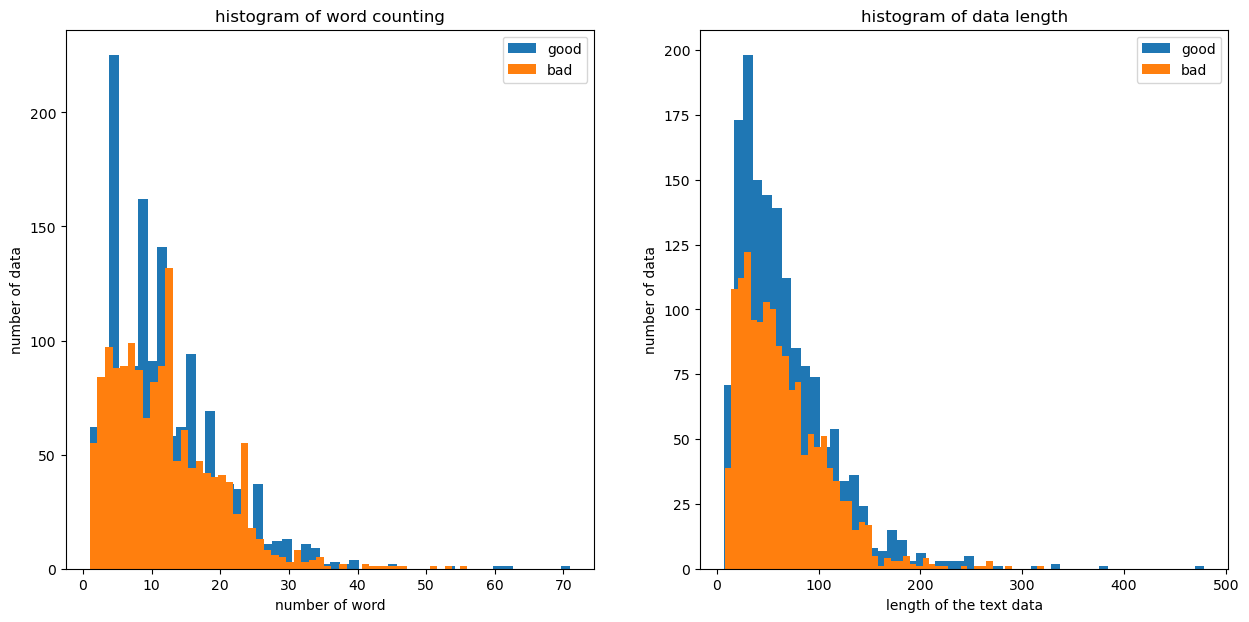

In [935]:
# data visualization

"""
reference: 
1. https://www.kaggle.com/code/bhaveshkumar2806/complete-eda-and-visualization-of-text-data
2. https://www.geeksforgeeks.org/generating-word-cloud-python/
"""
# 1. word counting and sentence length(by character)
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
df['word_count'] = df['sentence'].apply(lambda x: len(str(x).split()))
# plt.figure()
plt.hist(df['word_count'][df['score'] == 1], bins = 50, label = 'good')
plt.hist(df['word_count'][df['score'] == 0], bins = 50, label = 'bad')
plt.title("histogram of word counting")
plt.xlabel("number of word")
plt.ylabel("number of data")
plt.legend()

plt.subplot(1,2,2)
df['sentence_len'] = df['sentence'].apply(lambda x: len(str(x)))
# plt.figure()
plt.hist(df['sentence_len'][df['score'] == 1], bins = 50, label = 'good')
plt.hist(df['sentence_len'][df['score'] == 0], bins = 50, label = 'bad')
plt.title("histogram of data length")
plt.xlabel("length of the text data")
plt.ylabel("number of data")
plt.legend()

Text(0.5, 1.0, 'Top 20 trigrams')

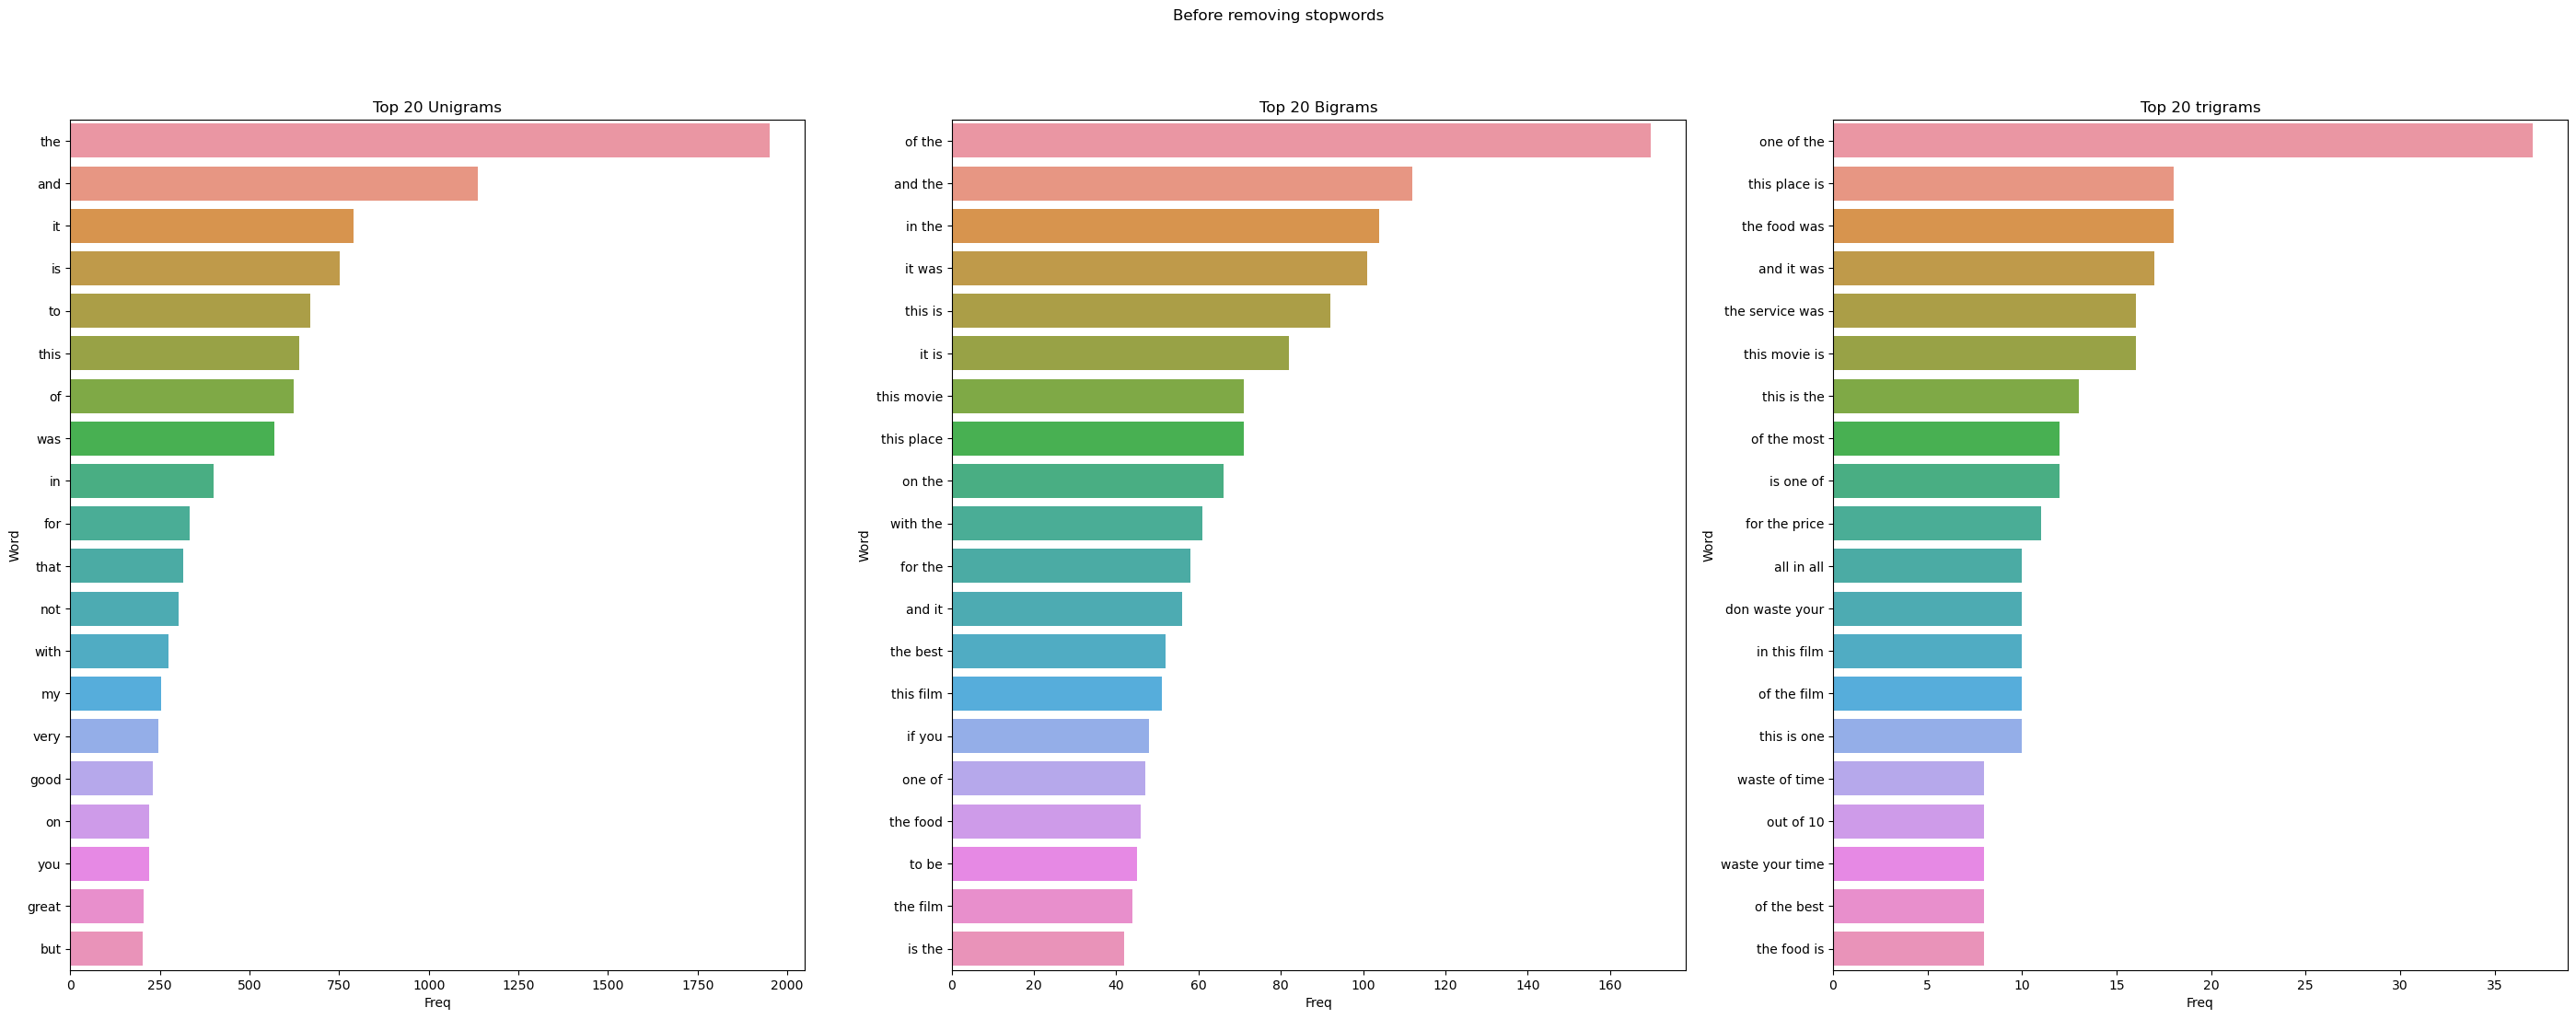

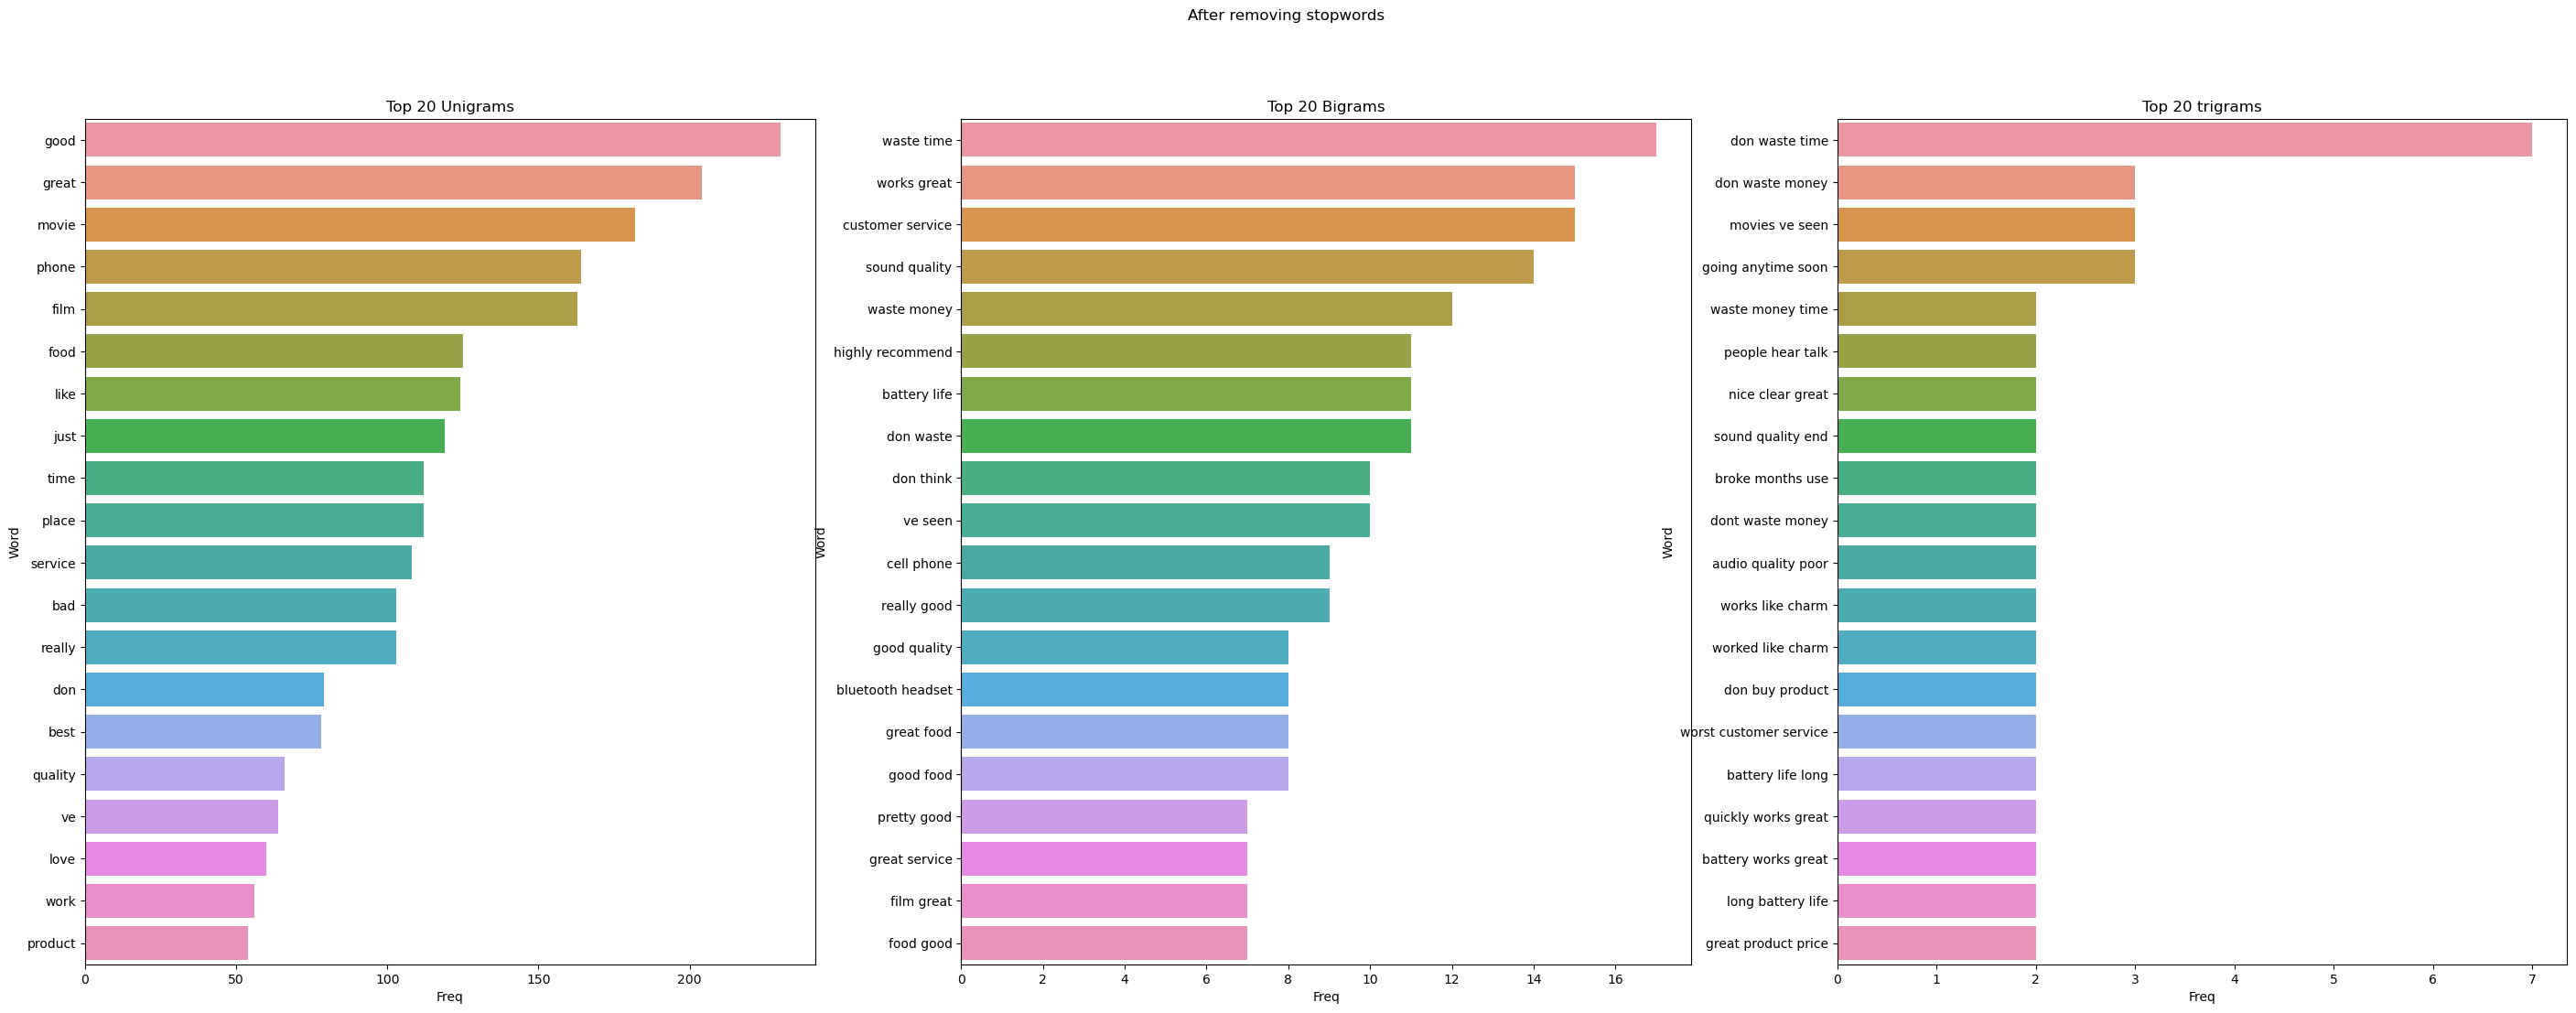

In [936]:
# 2. n-grams distribution 
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

# frequency distribution before removing stop words:

stop_words = None
n = 20
unigrams = get_top_ngrams(df['sentence'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['sentence'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['sentence'], (3, 3), stop_words, n)

fig, axes = plt.subplots(1, 3, figsize=(35, 12))
fig.suptitle('Before removing stopwords')
sns.barplot(ax=axes[0],x='Freq', y='Word', data=unigrams)
axes[0].set_title('Top 20 Unigrams')
sns.barplot(ax=axes[1],x='Freq', y='Word', data=bigrams)
axes[1].set_title('Top 20 Bigrams')
sns.barplot(ax=axes[2],x='Freq', y='Word', data=trigrams)
axes[2].set_title('Top 20 trigrams')

# frequency distribution after removing stop words:

stop_words = "english"
n = 20
unigrams = get_top_ngrams(df['sentence'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['sentence'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['sentence'], (3, 3), stop_words, n)

fig, axes = plt.subplots(1, 3, figsize=(35, 12))
fig.suptitle('After removing stopwords')
sns.barplot(ax=axes[0],x='Freq', y='Word', data=unigrams)
axes[0].set_title('Top 20 Unigrams')
sns.barplot(ax=axes[1],x='Freq', y='Word', data=bigrams)
axes[1].set_title('Top 20 Bigrams')
sns.barplot(ax=axes[2],x='Freq', y='Word', data=trigrams)
axes[2].set_title('Top 20 trigrams')


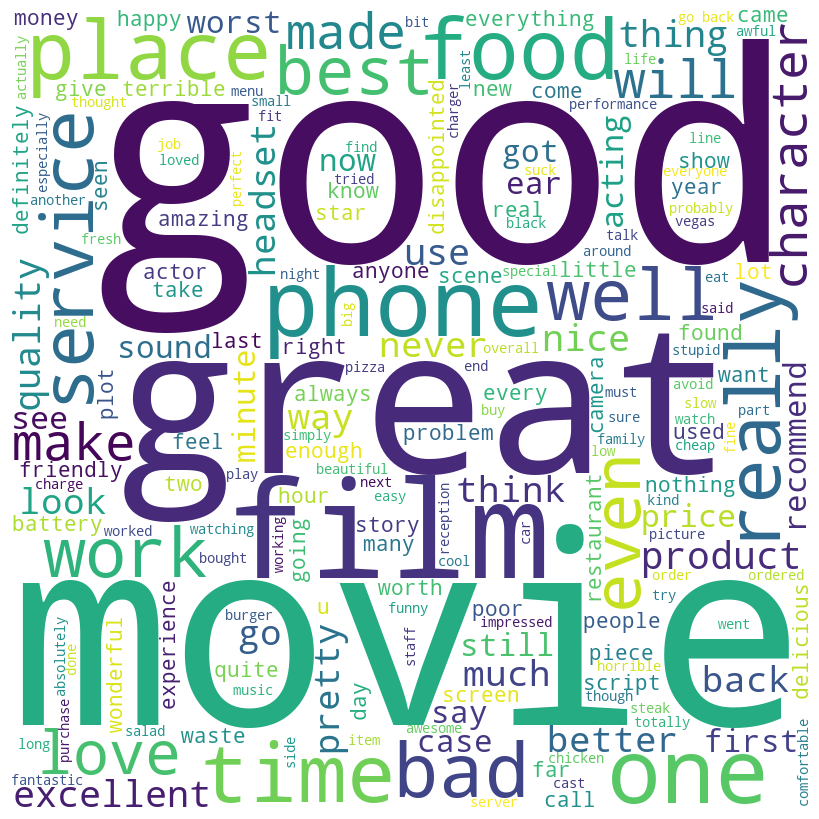

In [937]:
#3. Word cloud
from wordcloud import WordCloud, STOPWORDS
 
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df['sentence']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [938]:
# TF-IDF features

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['sentence']
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [939]:
# just try to see part of the tfidf array
c = np.argsort(-tfidf[0,:].toarray())[0,0]

print(c)
tfidf[0:10, c:c+10].toarray()

1013


array([[0.39845544, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [940]:
# Naive Bayes classifier
"""
We choose Bernoulli Naive Bayes here, because our y label (score) is binary-valued feature.
"""

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_roc(y_test, y_pred_prob, clf):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('ROC curve of ' + clf)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [941]:
# first we split the training data and testing data, here we use the tfidf feature to train.
x_train, x_test, y_train, y_test = train_test_split(tfidf, df['score'], test_size=0.2, random_state=0)

# here we build bnb classifier, train and predict.
clf_bnb_tfidf = BernoulliNB()
clf_bnb_tfidf.fit(x_train, y_train)
y_pred_bnb_tfidf = clf_bnb_tfidf.predict(x_test)
y_pred_prob_bnb_tfidf = clf_bnb_tfidf.predict_proba(x_test)[:,1]

# here we build mnb classifier, train and predict.
clf_mnb_tfidf = MultinomialNB()
clf_mnb_tfidf.fit(x_train, y_train)
y_pred_mnb_tfidf = clf_mnb_tfidf.predict(x_test)
y_pred_prob_mnb_tfidf = clf_mnb_tfidf.predict_proba(x_test)[:,1]

# here we build gnb classifier, train and predict.
clf_gnb_tfidf = GaussianNB()
clf_gnb_tfidf.fit(x_train.toarray(), y_train)
y_pred_gnb_tfidf = clf_gnb_tfidf.predict(x_test.toarray())
y_pred_prob_gnb_tfidf = clf_gnb_tfidf.predict_proba(x_test.toarray())[:,1]

In [942]:
# Now, lets change the feature to word frequency

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix

# split the data to training and testing data
x_train, x_test, y_train, y_test = train_test_split(df_counts, df['score'], test_size=0.2, random_state=0)

# here we build bnb classifier, train and predict.

clf_bnb_freq = BernoulliNB()
clf_bnb_freq.fit(x_train, y_train)
y_pred_bnb_freq = clf_bnb_freq.predict(x_test)
y_pred_prob_bnb_freq = clf_bnb_freq.predict_proba(x_test)[:,1]

# here we build mnb classifier, train and predict.
clf_mnb_freq = MultinomialNB()
clf_mnb_freq.fit(x_train, y_train)
y_pred_mnb_freq = clf_mnb_freq.predict(x_test)
y_pred_prob_mnb_freq = clf_mnb_freq.predict_proba(x_test)[:,1]

# here we build gnb classifier, train and predict.
clf_gnb_freq = GaussianNB()
clf_gnb_freq.fit(x_train.toarray(), y_train)
y_pred_gnb_freq = clf_gnb_freq.predict(x_test.toarray())
y_pred_prob_gnb_freq = clf_gnb_freq.predict_proba(x_test.toarray())[:,1]

TFIDF accuracy(in %): 82.91457286432161
word freq. accuracy(in %): 82.91457286432161
First, for the Bernoulli naive bayes classifier, they share exactly the same results no matter we use TFIDF feature or word frequency feature to train the model. It is reasonable because Bernoulli NB assume that the data feature is binary, default setting is to truncate all the values that larger than 0 to become 1. As a result, the TFIDF vector will be the same as the word freqency vector. Then the prediction results of course are the same because the training data are the same.


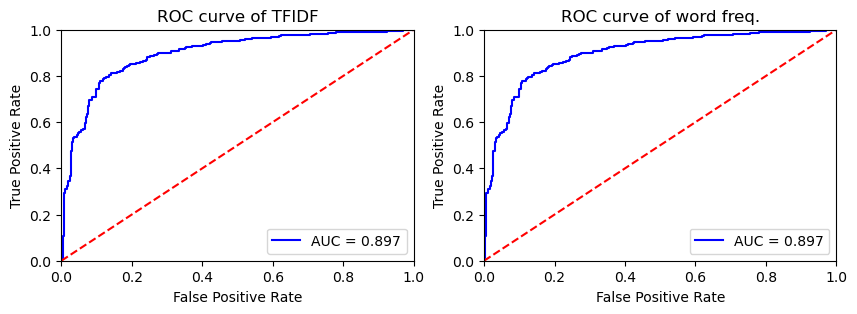

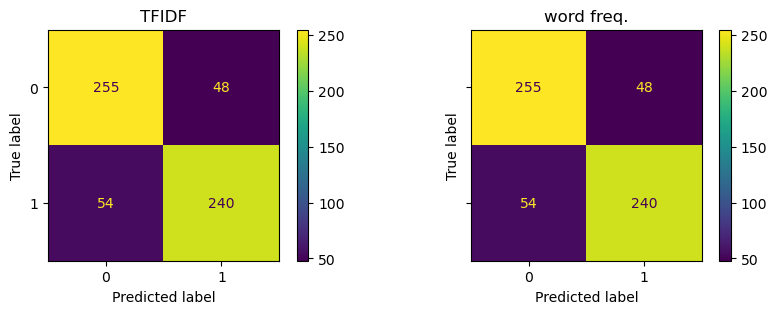

In [948]:
# comparison perfomance: Bernoulli NB

print("TFIDF accuracy(in %):", metrics.accuracy_score(y_test, y_pred_bnb_tfidf)*100)
print("word freq. accuracy(in %):", metrics.accuracy_score(y_test, y_pred_bnb_freq)*100)

plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plot_roc(y_test, y_pred_prob_bnb_tfidf, "TFIDF")
plt.subplot(1,2,2)
plot_roc(y_test, y_pred_prob_bnb_freq, "word freq.")

f, axes = plt.subplots(1, 2, figsize=(10,3), sharey='row')
cf_matrix = confusion_matrix(y_test, y_pred_bnb_tfidf)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= clf_bnb_tfidf.classes_)
disp.plot(ax=axes[0])
disp.ax_.set_title("TFIDF")
cf_matrix = confusion_matrix(y_test, y_pred_bnb_freq)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= clf_bnb_freq.classes_)
disp.plot(ax=axes[1])
disp.ax_.set_title("word freq.")

In [950]:
# summary of BNB results:
print("First, for the Bernoulli naive bayes classifier, they share exactly the same results no matter we use TFIDF feature or word frequency feature to train the model. It is reasonable because Bernoulli NB assume that the data feature is binary, default setting is to truncate all the values that larger than 0 to become 1. As a result, the TFIDF vector will be the same as the word freqency vector. Then the prediction results of course are the same because the training data are the same.")

First, for the Bernoulli naive bayes classifier, they share exactly the same results no matter we use TFIDF feature or word frequency feature to train the model. It is reasonable because Bernoulli NB assume that the data feature is binary, default setting is to truncate all the values that larger than 0 to become 1. As a result, the TFIDF vector will be the same as the word freqency vector. Then the prediction results of course are the same because the training data are the same.


TFIDF accuracy(in %): 81.74204355108877
word freq. accuracy(in %): 82.41206030150754


Text(0.5, 1.0, 'word freq.')

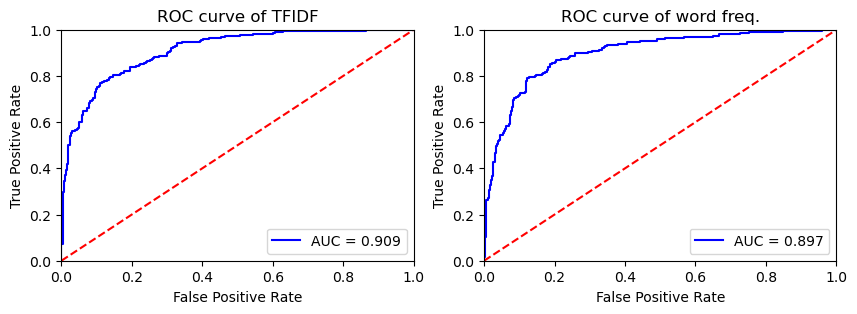

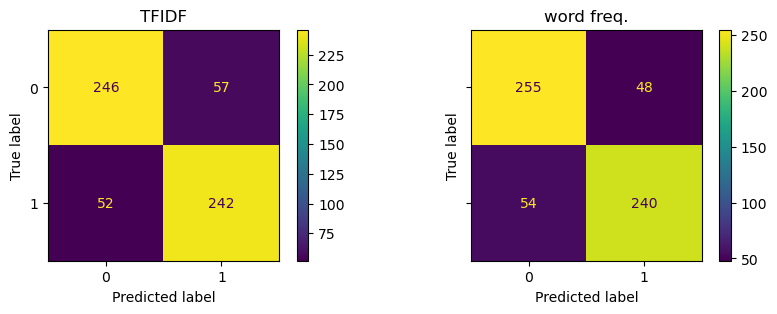

In [944]:
# comparison perfomance: Multinomial NB

print("TFIDF accuracy(in %):", metrics.accuracy_score(y_test, y_pred_mnb_tfidf)*100)
print("word freq. accuracy(in %):", metrics.accuracy_score(y_test, y_pred_mnb_freq)*100)

plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plot_roc(y_test, y_pred_prob_mnb_tfidf, "TFIDF")
plt.subplot(1,2,2)
plot_roc(y_test, y_pred_prob_mnb_freq, "word freq.")

f, axes = plt.subplots(1, 2, figsize=(10,3), sharey='row')
cf_matrix = confusion_matrix(y_test, y_pred_mnb_tfidf)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= clf_mnb_tfidf.classes_)
disp.plot(ax=axes[0])
disp.ax_.set_title("TFIDF")
cf_matrix = confusion_matrix(y_test, y_pred_bnb_freq)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= clf_mnb_freq.classes_)
disp.plot(ax=axes[1])
disp.ax_.set_title("word freq.")

In [952]:
# summary of MNB results:
print("Second, for the Multinomial naive bayes classifier, the results between TFIDF training and word frequency training are comparable. TFIDF accuracy=  81.74%; word freq. accuracy= 82.41%, TFIDF accuracy is slightly larger than the word freq. accuarcy, but for the AUC, TFIDF AUC = 0.909, word freq. AUC = 0.897, which is TFIDF AUC slightly smaller than the word freq. AUC. And we can observe that the number of false positive is decrease when the feature is changed to word frequency (TFIDF 57 --> word freq. 48), but the false negative is slight increase. (TFIDF 52 --> word freq. 54). These give conclusion that the TFIDF reweighting doesn't affect the document vector too much, because the representative words that dominate the score (e.g. `good`, `bad`, `fantastic`) distributed almost unifomly in different documents, that is the values of them will become smaller than the word frequency. But the words that related to the specific category, for example the words describe the scenario of the movie, will be reweighted to a `relatively` larger value, but this will be additional noise for our data, because this is useless for the classification (score). So, in our case, TFIDF transformation wont give us better result. But in our imagination, if the classification target is about the category of items, I think TFIDF will give us better result.")

Second, for the Multinomial naive bayes classifier, the results between TFIDF training and word frequency training are comparable. TFIDF accuracy=  81.74%; word freq. accuracy= 82.41%, TFIDF accuracy is slightly larger than the word freq. accuarcy, but for the AUC, TFIDF AUC = 0.909, word freq. AUC = 0.897, which is TFIDF AUC slightly smaller than the word freq. AUC. And we can observe that the number of false positive is decrease when the feature is changed to word frequency (TFIDF 57 --> word freq. 48), but the false negative is slight increase. (TFIDF 52 --> word freq. 54). These give conclusion that the TFIDF reweighting doesn't affect the document vector too much, because the representative words that dominate the score (e.g. `good`, `bad`, `fantastic`) distributed almost unifomly in different documents, that is the values of them will become smaller than the word frequency. But the words that related to the specific category, for example the words describe the scenario of the mov

TFIDF accuracy(in %): 67.67169179229481
word freq. accuracy(in %): 65.15912897822446


Text(0.5, 1.0, 'word freq.')

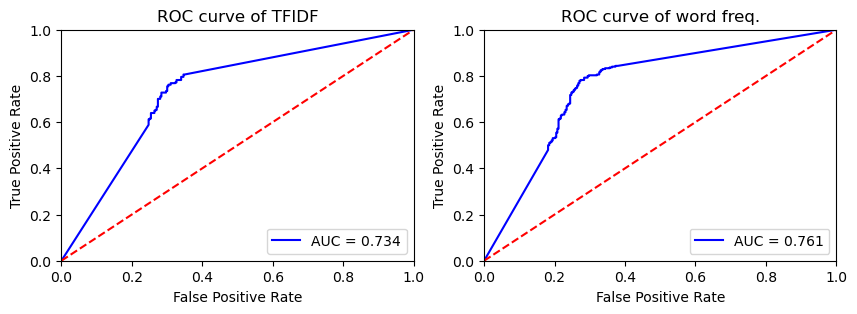

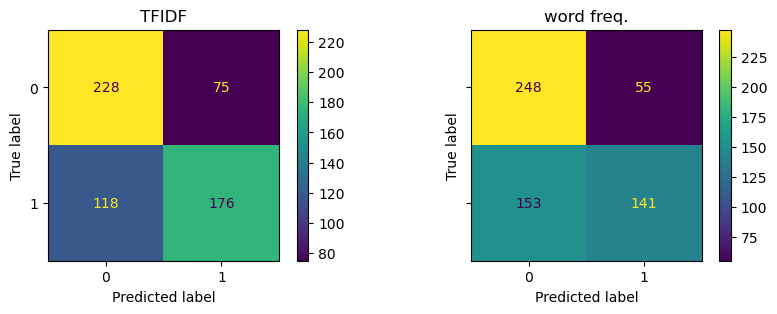

In [945]:
# comparison perfomance: Gaussian NB

print("TFIDF accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb_tfidf)*100)
print("word freq. accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb_freq)*100)

plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plot_roc(y_test, y_pred_prob_gnb_tfidf, "TFIDF")
plt.subplot(1,2,2)
plot_roc(y_test, y_pred_prob_gnb_freq, "word freq.")

f, axes = plt.subplots(1, 2, figsize=(10,3), sharey='row')
cf_matrix = confusion_matrix(y_test, y_pred_gnb_tfidf)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= clf_gnb_tfidf.classes_)
disp.plot(ax=axes[0])
disp.ax_.set_title("TFIDF")
cf_matrix = confusion_matrix(y_test, y_pred_gnb_freq)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= clf_gnb_freq.classes_)
disp.plot(ax=axes[1])
disp.ax_.set_title("word freq.")

In [953]:
# summary of GNB results:
print("Third, for the Gaussian naive bayes classifier, no matter we use TFIDF or word frequency to train, the performance are sufficiently lower than the Bernoulli NB and Multinomial NB, so it tells us that this model is not suitable for our data. And this is reasonable because Gaussian NB assumes that the continuous values associated with each class are distributed accroding to Gasussian distribution, but this prior doesn't valid in our data. (The word count for each sentence of course not follow normal distribution.)")

Third, for the Gaussian naive bayes classifier, no matter we use TFIDF or word frequency to train, the performance are sufficiently lower than the Bernoulli NB and Multinomial NB, so it tells us that this model is not suitable for our data. And this is reasonable because Gaussian NB assumes that the continuous values associated with each class are distributed accroding to Gasussian distribution, but this prior doesn't valid in our data. (The word count for each sentence of course not follow normal distribution.)


### Part4:

In [947]:
# data preprocess improvement:

"""
Reference:
1. https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/#
2. https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing
"""

print("Here are some data preprocess improvement we can do in additional:")
print('\n')
print("1. Stemming and Lemmatization --")
print("Stemming: the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.")
print("Lemmatization: It stems the word but makes sure that it does not lose its meaning. It has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.")
print('\n')
print("2. spelling correction --")
print("Typos are common in text data and we might want to correct those spelling mistakes before we do our analysis. Because it affect the statistic of word. The package `pyspellchecker` is helpful.")
print('\n')
print("3. Remove the email address names, and url --")
print("Because the email address won't contain the useful information for classification usually, for example in the dataset of Twenty Newsgroups, each text data contains the email address and names of both sender and recipient, and some tel and fax number. These information is useless for the category classification.")

Here are some data preprocess improvement we can do in additional:


1. Stemming and Lemmatization --
Stemming: the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.
Lemmatization: It stems the word but makes sure that it does not lose its meaning. It has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.


2. spelling correction --
Typos are common in text data and we might want to correct those spelling mistakes before we do our analysis. Because it affect the statistic of word. The package `pyspellchecker` is helpful.


3. Remove the email address names, and url --
Because the email address won't contain the useful information for classification usually, for example in the dataset of Twenty Newsgroups, each text data contains the email address and name